In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the Python path
parent_dir = os.path.abspath('../..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
# Import modules
import ddsp_textures.loss.functions
import ddsp_textures.auxiliar.filterbanks

# Import extra packages
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import torch

In [2]:
# Load audio to filter -----------------------------------
fire_path  = ".."+"/sounds/fire_sounds/fire.wav"
water_path = ".."+"/sounds/water_sounds/water.wav"
sr     = 44100
new_sr = sr // 4 # for log_bank
fire_audio, _  = librosa.load(fire_path, sr=sr)
water_audio, _ = librosa.load(water_path, sr=sr)
# Make list of segments for fire and water --------------
frame_size     = 2**15
new_frame_size = frame_size // 4
hop_size   = 2**15
fire_segments = []
water_segments = []
for i in range(0, len(fire_audio)-frame_size, hop_size):
    fire_segments.append(fire_audio[i:i+frame_size])
for i in range(0, len(water_audio)-frame_size, hop_size):
    water_segments.append(water_audio[i:i+frame_size])
# Initialize erb_bank and log_bank for statistics loss --
N_filter_bank = 32
M_filter_bank = 20
erb_bank    = ddsp_textures.auxiliar.filterbanks.EqualRectangularBandwidth(frame_size, sr, N_filter_bank, 20, sr // 2)
log_bank    = ddsp_textures.auxiliar.filterbanks.Logarithmic(new_frame_size,       new_sr, M_filter_bank, 10, new_sr // 4)
import torchaudio
downsampler = torchaudio.transforms.Resample(sr, new_sr)

In [3]:
#Testing Statistics functions --------------------------------------------------

fire_segment  = fire_segments[np.random.randint(len(fire_segments))]
water_segment = water_segments[np.random.randint(len(water_segments))]
fire_segment  = torch.tensor(fire_segment)
water_segment = torch.tensor(water_segment)
fire_stats  = ddsp_textures.loss.functions.statistics(fire_segment,  N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
water_stats = ddsp_textures.loss.functions.statistics(water_segment, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
print("Fire statistics:\n")
print("stats_1:\n", fire_stats[0])
print("stats_2:\n", fire_stats[1])
print("stats_3:\n", fire_stats[2])
print("stats_4:\n", fire_stats[3])
print("stats_5:\n", fire_stats[4])
print("Water statistics:\n")
print("stats_1:\n", water_stats[0])
print("stats_2:\n", water_stats[1])
print("stats_3:\n", water_stats[2])
print("stats_4:\n", water_stats[3])
print("stats_5:\n", water_stats[4])

Fire statistics:

stats_1:
 tensor([[5.2784e+00, 3.6812e-01, 1.1513e-02, 4.8793e-03],
        [2.6594e+00, 2.7765e-01, 8.1791e-03, 4.9247e-03],
        [1.6744e+00, 2.8690e-01, 1.5346e-02, 6.0551e-03],
        [1.0703e+00, 2.6059e-01, 9.6055e-03, 5.7624e-03],
        [5.3476e-01, 3.2089e-01, 1.1338e-02, 5.7725e-03],
        [4.6046e-01, 2.8301e-01, 1.6095e-02, 7.5983e-03],
        [1.8533e-01, 5.9292e-01, 6.8821e-02, 4.5541e-02],
        [1.4347e-01, 7.0057e-01, 1.1259e-01, 9.5993e-02],
        [1.7821e-01, 5.7513e-01, 6.5293e-02, 4.2542e-02],
        [1.1363e-01, 5.5839e-01, 7.8830e-02, 6.0911e-02],
        [8.1026e-02, 1.0100e+00, 9.7131e-02, 7.8306e-02],
        [7.2939e-02, 1.2408e+00, 1.0250e-01, 8.1516e-02],
        [6.9252e-02, 1.1823e+00, 9.3725e-02, 7.1293e-02],
        [7.3346e-02, 1.1745e+00, 9.0174e-02, 6.3464e-02],
        [6.5718e-02, 1.3182e+00, 1.0253e-01, 7.9129e-02],
        [5.7978e-02, 1.3611e+00, 1.0292e-01, 9.0046e-02],
        [6.2399e-02, 3.3239e+00, 1.9612e-01,

loss_i tensor(0.2976)
loss_i tensor(0.0271)
loss_i tensor(0.0031)
loss_i tensor(0.0290, dtype=torch.float64)
loss_i tensor(0.0070, dtype=torch.float64)


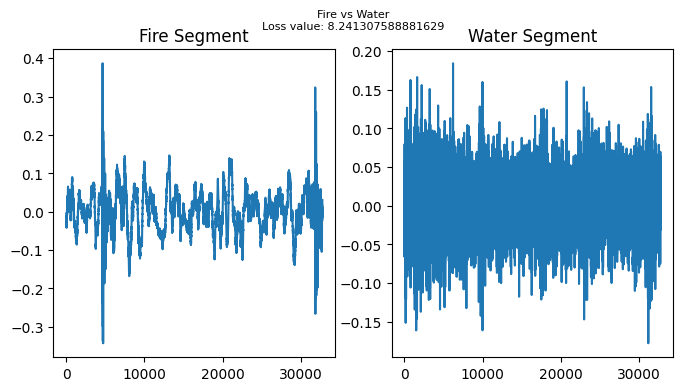

loss_i tensor(1.8083)
loss_i tensor(0.0241)
loss_i tensor(0.0027)
loss_i tensor(0.0283, dtype=torch.float64)
loss_i tensor(0.0064, dtype=torch.float64)


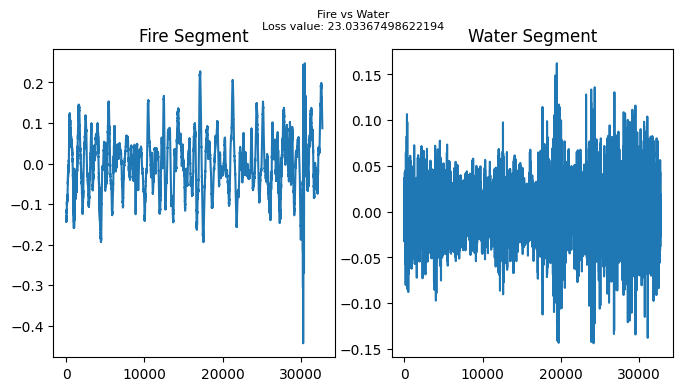

loss_i tensor(0.4102)
loss_i tensor(0.0158)
loss_i tensor(0.0018)
loss_i tensor(0.0238, dtype=torch.float64)
loss_i tensor(0.0072, dtype=torch.float64)


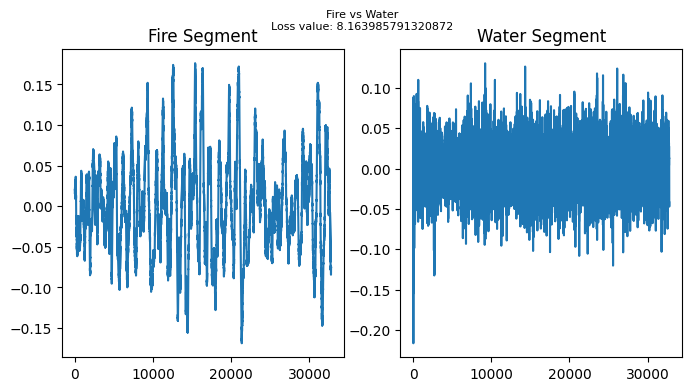

loss_i tensor(2.0498)
loss_i tensor(0.0120)
loss_i tensor(0.0022)
loss_i tensor(0.0171, dtype=torch.float64)
loss_i tensor(0.0060, dtype=torch.float64)


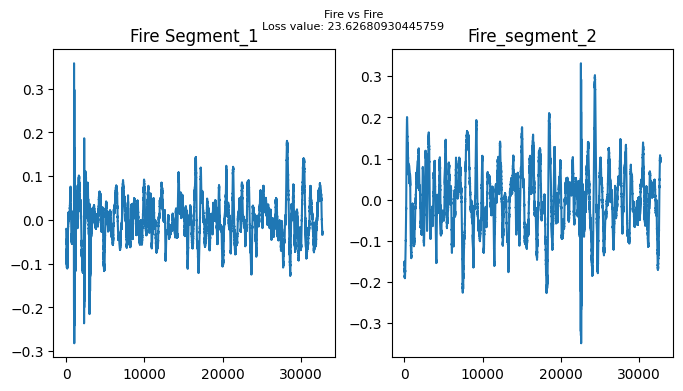

loss_i tensor(0.1924)
loss_i tensor(0.0114)
loss_i tensor(0.0020)
loss_i tensor(0.0137, dtype=torch.float64)
loss_i tensor(0.0056, dtype=torch.float64)


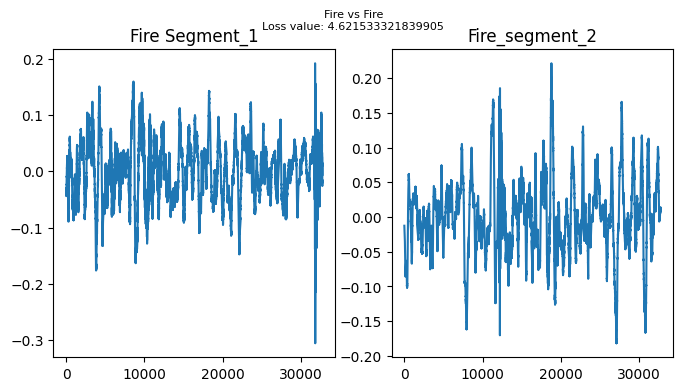

loss_i tensor(0.4997)
loss_i tensor(0.0151)
loss_i tensor(0.0029)
loss_i tensor(0.0180, dtype=torch.float64)
loss_i tensor(0.0063, dtype=torch.float64)


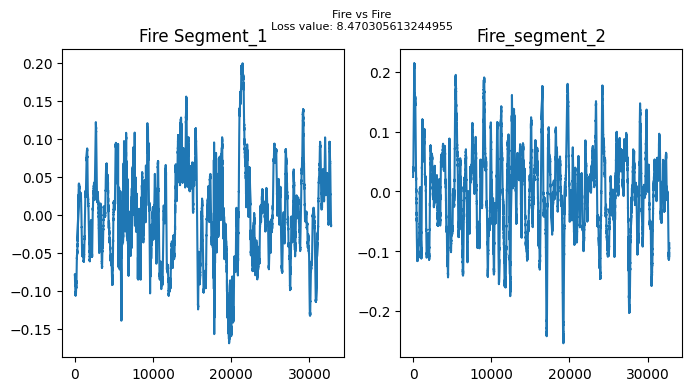

In [4]:
# Test Statistics loss function on three random pair of segments and plot them
for i in range(3):
    fire_segment  = fire_segments[np.random.randint(len(fire_segments))]
    water_segment = water_segments[np.random.randint(len(water_segments))]
    fire_segment  = torch.tensor(fire_segment)
    #play water and fire segments
    display(Audio(fire_segment, rate=sr))
    display(Audio(water_segment, rate=sr))
    water_segment = torch.tensor(water_segment)
    loss_value = ddsp_textures.loss.functions.statistics_loss(fire_segment, water_segment, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.plot(fire_segment)
    ax1.set_title('Fire Segment')
    ax2.plot(water_segment)
    ax2.set_title('Water Segment')
    fig.suptitle(f'Fire vs Water\nLoss value: {loss_value}', fontsize=8)
    plt.show()
# Test Statistics loss function on three random pair of fair
for i in range(3):
    fire_segment_1 = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment_2 = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment_1 = torch.tensor(fire_segment_1)
    fire_segment_2 = torch.tensor(fire_segment_2)
    #play water and fire segments
    display(Audio(fire_segment_1, rate=sr))
    display(Audio(fire_segment_2, rate=sr))
    loss_value = ddsp_textures.loss.functions.statistics_loss(fire_segment_1, fire_segment_2, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.plot(fire_segment_1)
    ax1.set_title('Fire Segment_1')
    ax2.plot(fire_segment_2)
    ax2.set_title('Fire_segment_2')
    fig.suptitle(f'Fire vs Fire\nLoss value: {loss_value}', fontsize=8)
    plt.show()

In [5]:
#Take 16 segments and make a batch
fire_batch = []
for i in range(32):
    fire_segment = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment = torch.tensor(fire_segment)
    fire_batch.append(fire_segment)
fire_batch = torch.stack(fire_batch, dim=0)

water_batch = []
for i in range(32):
    water_segment = water_segments[np.random.randint(len(water_segments))]
    water_segment = torch.tensor(water_segment)
    water_batch.append(water_segment)
water_batch = torch.stack(water_batch, dim=0)

import time
start = time.time()
loss = ddsp_textures.loss.functions.batch_statistics_loss(fire_batch, water_batch, N_filter_bank, M_filter_bank, erb_bank, log_bank, downsampler)
end = time.time()
print("Time taken: ", end-start)
print("Batch loss value: ", loss)


loss_i tensor(0.3217)
loss_i tensor(0.0228)
loss_i tensor(0.0029)
loss_i tensor(0.0235, dtype=torch.float64)
loss_i tensor(0.0066, dtype=torch.float64)
loss_i tensor(0.6071)
loss_i tensor(0.0121)
loss_i tensor(0.0021)
loss_i tensor(0.0201, dtype=torch.float64)
loss_i tensor(0.0077, dtype=torch.float64)
loss_i tensor(0.9538)
loss_i tensor(0.0274)
loss_i tensor(0.0029)
loss_i tensor(0.0260, dtype=torch.float64)
loss_i tensor(0.0063, dtype=torch.float64)
loss_i tensor(0.3628)
loss_i tensor(0.0159)
loss_i tensor(0.0022)
loss_i tensor(0.0179, dtype=torch.float64)
loss_i tensor(0.0075, dtype=torch.float64)
loss_i tensor(0.2480)
loss_i tensor(0.0241)
loss_i tensor(0.0028)
loss_i tensor(0.0291, dtype=torch.float64)
loss_i tensor(0.0062, dtype=torch.float64)
loss_i tensor(0.6388)
loss_i tensor(0.0271)
loss_i tensor(0.0032)
loss_i tensor(0.0322, dtype=torch.float64)
loss_i tensor(0.0060, dtype=torch.float64)
loss_i tensor(0.1624)
loss_i tensor(0.0198)
loss_i tensor(0.0029)
loss_i tensor(0.0242, 

In [6]:
# Load audio to filter -----------------------------------
fire_path  = ".."+"/sounds/fire_sounds/fire.wav"
water_path = ".."+"/sounds/water_sounds/water.wav"
sr     = 44100
new_sr = sr // 4 # for log_bank
fire_audio, _  = librosa.load(fire_path, sr=sr)
water_audio, _ = librosa.load(water_path, sr=sr)
# Make list of segments for fire and water --------------
frame_size     = 2**15
new_frame_size = frame_size // 4
hop_size   = 2**15
fire_segments = []
water_segments = []
for i in range(0, len(fire_audio)-frame_size, hop_size):
    fire_segments.append(fire_audio[i:i+frame_size])
for i in range(0, len(water_audio)-frame_size, hop_size):
    water_segments.append(water_audio[i:i+frame_size])
# Initialize erb_bank and log_bank for statistics loss --
N_filter_bank = 32
M_filter_bank = 20
erb_bank    = ddsp_textures.auxiliar.filterbanks.EqualRectangularBandwidth(frame_size, sr, N_filter_bank, 20, sr // 2)
log_bank    = ddsp_textures.auxiliar.filterbanks.Logarithmic(new_frame_size,       new_sr, M_filter_bank, 10, new_sr // 4)
import torchaudio

import ddsp_textures.loss
downsampler = torchaudio.transforms.Resample(sr, new_sr)

# pick random segments
fire_segment  = fire_segments[np.random.randint(len(fire_segments))]
water_segment = water_segments[np.random.randint(len(water_segments))]
fire_segment  = torch.tensor(fire_segment)
water_segment = torch.tensor(water_segment)
#play water and fire segments
display(Audio(fire_segment, rate=sr))
display(Audio(water_segment, rate=sr))
# Compute stems
from ddsp_textures.auxiliar.features import *
stems_fire  = features_envelopes_stems(fire_segment, _, erb_bank)
print("fire_shape: ", stems_fire.shape)
stems_water = features_envelopes_stems(water_segment, _, erb_bank)
print("water_shape: ", stems_water.shape)
# Compute loss
loss_value = ddsp_textures.loss.functions.statistics_loss_stems(stems_fire, stems_water, N_filter_bank, M_filter_bank, log_bank, downsampler)


fire_shape:  torch.Size([32, 32768])
water_shape:  torch.Size([32, 32768])
loss_i tensor(1.0313)
loss_i tensor(0.0208)
loss_i tensor(0.0027)
loss_i tensor(0.0236, dtype=torch.float64)
loss_i tensor(0.0060, dtype=torch.float64)


In [7]:
#Take 32 segments and make a batch
fire_batch = []
for i in range(32):
    fire_segment = fire_segments[np.random.randint(len(fire_segments))]
    fire_segment = torch.tensor(fire_segment)
    fire_segment_stems = features_envelopes_stems(fire_segment, _, erb_bank)
    fire_batch.append(fire_segment_stems)
fire_batch = torch.stack(fire_batch, dim=0)

water_batch = []
for i in range(32):
    water_segment = water_segments[np.random.randint(len(water_segments))]
    water_segment = torch.tensor(water_segment)
    water_segment_stems = features_envelopes_stems(water_segment, _, erb_bank)
    water_batch.append(water_segment_stems)
water_batch = torch.stack(water_batch, dim=0)

# compute the loss and tell me how much time it took
import time
start = time.time()
loss = ddsp_textures.loss.functions.batch_statistics_loss_stems(fire_batch, water_batch, N_filter_bank, M_filter_bank, _, log_bank, downsampler)
end = time.time()
print("Time elapsed: ", end-start)
print("Batch loss value: ", loss)

loss_i tensor(0.8561)
loss_i tensor(0.0246)
loss_i tensor(0.0029)
loss_i tensor(0.0257, dtype=torch.float64)
loss_i tensor(0.0059, dtype=torch.float64)
loss_i tensor(2.0564)
loss_i tensor(0.0221)
loss_i tensor(0.0023)
loss_i tensor(0.0249, dtype=torch.float64)
loss_i tensor(0.0056, dtype=torch.float64)
loss_i tensor(0.0997)
loss_i tensor(0.0266)
loss_i tensor(0.0026)
loss_i tensor(0.0268, dtype=torch.float64)
loss_i tensor(0.0066, dtype=torch.float64)
loss_i tensor(0.1673)
loss_i tensor(0.0134)
loss_i tensor(0.0023)
loss_i tensor(0.0222, dtype=torch.float64)
loss_i tensor(0.0071, dtype=torch.float64)
loss_i tensor(0.3627)
loss_i tensor(0.0212)
loss_i tensor(0.0029)
loss_i tensor(0.0269, dtype=torch.float64)
loss_i tensor(0.0063, dtype=torch.float64)
loss_i tensor(1.0362)
loss_i tensor(0.0242)
loss_i tensor(0.0029)
loss_i tensor(0.0266, dtype=torch.float64)
loss_i tensor(0.0058, dtype=torch.float64)
loss_i tensor(0.1830)
loss_i tensor(0.0231)
loss_i tensor(0.0029)
loss_i tensor(0.0255, 